In [23]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("PACKAGES LOADED")
import gc
gc.collect()
mnist = input_data.read_data_sets('data/', one_hot=True)
trainimg   = mnist.train.images
trainlabel = mnist.train.labels
testimg    = mnist.test.images
testlabel  = mnist.test.labels
print ("MNIST ready")
tmp_pa = mnist.train.images[0,:]

PACKAGES LOADED
Extracting data/train-images-idx3-ubyte.gz


Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


MNIST ready


In [24]:
n_input = 784
n_output = 10
weights = {
    'wc1': tf.Variable(tf.random_normal([3, 3, 1, 64], stddev=0.1)),
##[filter_height, filter_width, in_channels, out_channels]
    'wd1': tf.Variable(tf.random_normal([14 * 14 * 64, n_output], stddev=0.1))
}
biases = {
    'bc1': tf.Variable(tf.random_normal([64], stddev=0.1)),
    'bd1': tf.Variable(tf.random_normal([n_output], stddev=0.1))
}

In [25]:
sess = tf.Session()
def imshow_gray(pacture_2_array):
    plt.figure(1)
    plt.imshow(pacture_2_array, cmap=plt.get_cmap("gray"))
    plt.title("[imshow] Gray Image")
    plt.colorbar()
    plt.draw()

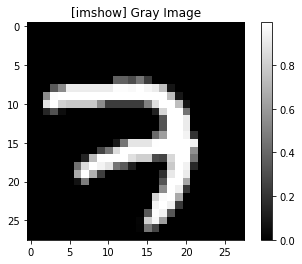

In [26]:
_input = tmp_pa
_input = tmp_pa
_w = weights
_b = biases
# Reshape input
_input_r = tf.reshape(_input, shape=[-1, 28, 28, 1])##[batch, in_height, in_width, in_channels]
arr_pa = sess.run(_input_r)
arr_pa.shape
arr_pa_2 = arr_pa[0,:,:,0]
imshow_gray(arr_pa_2)

In [50]:
init = tf.initialize_all_variables()
sess.run(init)
_conv1 = tf.nn.conv2d(_input_r, _w['wc1'], strides=[1, 1, 1, 1], padding='SAME')
conv1_arr = sess.run(_conv1)
_conv2 = tf.nn.bias_add(_conv1, _b['bc1'])
conv2_arr = sess.run(_conv2)
_conv3 = tf.nn.relu(_conv2)
conv3_arr = sess.run(_conv3)
__pool  = tf.nn.max_pool(_conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')##池化窗口的大小，取一个四维向量，一般是[1, height, width, 1]，因为我们不想在batch和channels上做池化，所以这两个维度设为了1
pool_arr = sess.run(__pool)
_pool = tf.nn.dropout(__pool, 0.1)
pool_arr_drop = sess.run(_pool)

_dense = tf.reshape(_pool, [-1, _w['wd1'].get_shape().as_list()[0]])
dense_arr = sess.run(_dense)

_out = tf.add(tf.matmul(_dense, _w['wd1']), _b['bd1'])
out_arr = sess.run(_out)

(1, 14, 14, 64)


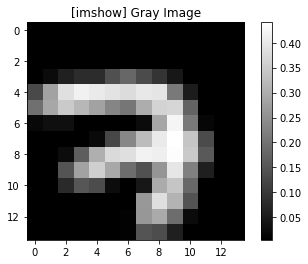

In [53]:
print(_pool.shape)
imshow_gray(pool_arr[0,:,:,0])
#imshow_gray(conv3_arr[0,:,:,0])

In [56]:
pool_arr[0,:,:,0]#drop的作用就是将一些赋值为了零，当x为零的时候对应的参数w的梯度为fx*x=0所以不会进行更新
pool_arr_drop[0,:,:,0]###每个样本也保留的也是不一样的

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.05036548, 0.        ,
        0.        , 0.        , 0.05036548, 0.05036548],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.0024056 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0. 